In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from astropy.stats import bootstrap
from astropy.utils import NumpyRNGContext
from sklearn.utils import resample
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier
import statistics

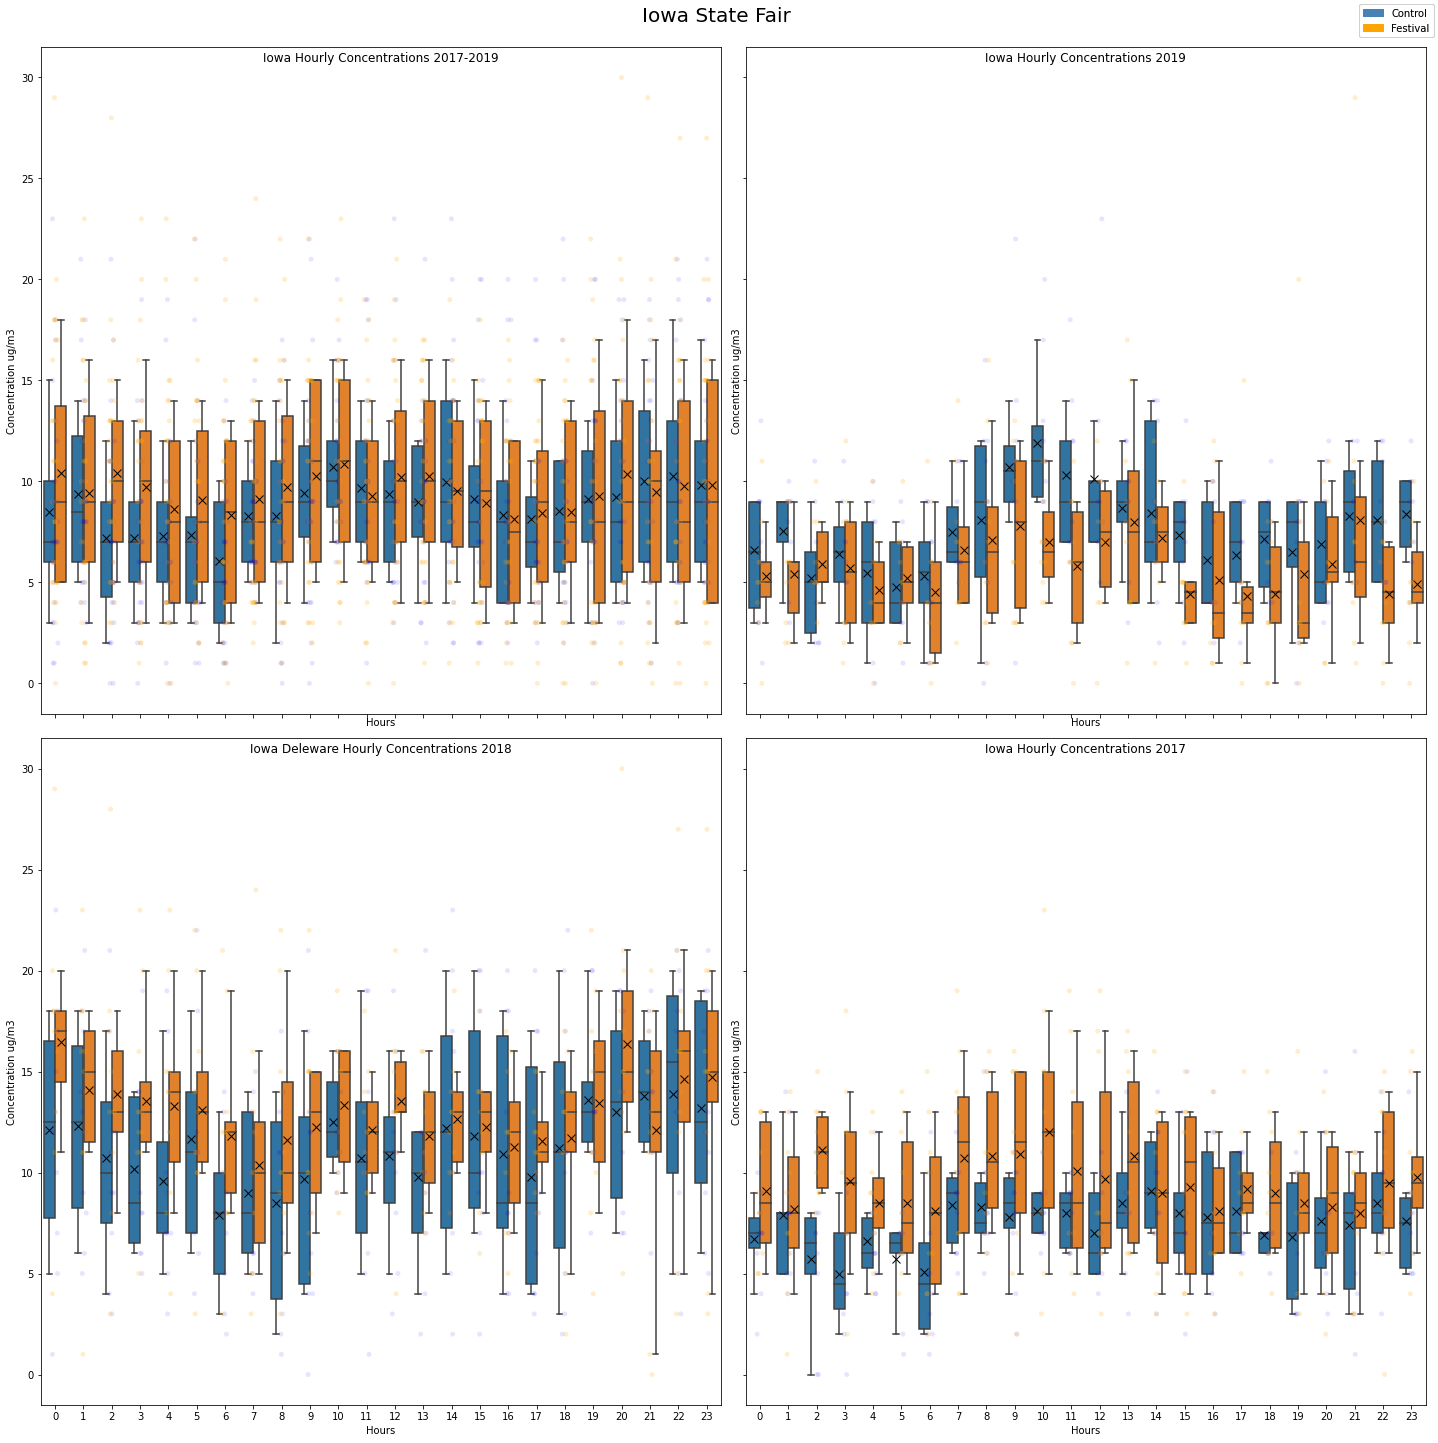

In [2]:
#all years
fig, axes = plt.subplots(2, 2, sharey=True,  sharex=True,figsize=(20,20)) #Set up subplot axes
fig.suptitle('Iowa State Fair',fontsize=20, y= 1.)

fig.tight_layout()

xls = pd.ExcelFile('ControlDayVar.xlsx')
df1= pd.read_excel(xls, 'IA_ControlDays').assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays').assign(Location=2)
DE_all =pd.concat([df1,df2])

DE= pd.melt(DE_all, id_vars=['Location'], var_name=['Hours'], value_name='Concentration ug/m3')
DE['Hours'] = pd.to_numeric(DE['Hours'])
DE['Concentration ug/m3']=pd.to_numeric(DE['Concentration ug/m3'])

ax1= sns.boxplot(ax= axes[0,0],x='Hours', y= 'Concentration ug/m3', hue= 'Location', data=DE,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white",
                                            "markeredgecolor":"black"}).set(title='Iowa Hourly Concentrations 2017-2019')

df1= pd.read_excel(xls, 'IA_ControlDays')#.assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays')#.assign(Location=2)
DE_all =pd.concat([df1,df2])
sns.stripplot(ax= axes[0,0],color='blue',alpha=0.1,data=df1)
sns.stripplot(ax= axes[0,0],color='orange',alpha=0.2,data=df2)

axes[0,0].set_title("Iowa Hourly Concentrations 2017-2019",y=1.0, pad=-14)

#####2019
xls = pd.ExcelFile('ControlDayVar.xlsx')
df1= pd.read_excel(xls, 'IA_ControlDays').assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays').assign(Location=2)
DE_all =pd.concat([df1[0:10],df2[0:10]])


DE= pd.melt(DE_all, id_vars=['Location'], var_name=['Hours'], value_name='Concentration ug/m3')
DE['Hours'] = pd.to_numeric(DE['Hours'])
DE['Concentration ug/m3']=pd.to_numeric(DE['Concentration ug/m3'])

ax2= sns.boxplot(ax= axes[0,1],x='Hours', y= 'Concentration ug/m3', hue= 'Location', data=DE,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white", 
                                             "markeredgecolor":"black"}).set(title='Iowa Hourly Concentrations 2019')
df1= pd.read_excel(xls, 'IA_ControlDays')#.assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays')#.assign(Location=2)
DE_all =pd.concat([df1[0:10],df2[0:10]])
axes[0,1].set_title("Iowa Hourly Concentrations 2019",y=1.0, pad=-14)

sns.stripplot(ax= axes[0,1],color='blue',alpha=0.1,data=df1[0:10])
sns.stripplot(ax= axes[0,1],color='orange',alpha=0.2,data=df2[0:10])

### 2018
xls = pd.ExcelFile('ControlDayVar.xlsx')
df1= pd.read_excel(xls, 'IA_ControlDays').assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays').assign(Location=2)
DE_all =pd.concat([df1[10:20],df2[10:21]])

DE= pd.melt(DE_all, id_vars=['Location'], var_name=['Hours'], value_name='Concentration ug/m3')
DE['Hours'] = pd.to_numeric(DE['Hours'])
DE['Concentration ug/m3']=pd.to_numeric(DE['Concentration ug/m3'])

ax3= sns.boxplot(ax= axes[1,0],x='Hours', y= 'Concentration ug/m3', hue= 'Location', data=DE,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white", 
                                             "markeredgecolor":"black"}).set(title='Iowa Hourly Concentrations 2018')
df1= pd.read_excel(xls, 'IA_ControlDays')#.assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays')#.assign(Location=2)
DE_all =pd.concat([df1[10:20],df2[10:21]])
axes[1,0].set_title("Iowa Deleware Hourly Concentrations 2018",y=1.0, pad=-14)
sns.stripplot(ax= axes[1,0],color='blue',alpha=0.1,data=df1[10:20])
sns.stripplot(ax= axes[1,0],color='orange',alpha=0.2,data=df2[10:21])

#### 2017
xls = pd.ExcelFile('ControlDayVar.xlsx')
df1= pd.read_excel(xls, 'IA_ControlDays').assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays').assign(Location=2)
DE_all =pd.concat([df1[20:30],df2[21:31]])

DE= pd.melt(DE_all, id_vars=['Location'], var_name=['Hours'], value_name='Concentration ug/m3')
DE['Hours'] = pd.to_numeric(DE['Hours'])
DE['Concentration ug/m3']=pd.to_numeric(DE['Concentration ug/m3'])

ax4= sns.boxplot(ax= axes[1,1],x='Hours', y= 'Concentration ug/m3', hue= 'Location', data=DE,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white", 
                                             "markeredgecolor":"black"}).set(title='Iowa Hourly Concentrations 2017')
df1= pd.read_excel(xls, 'IA_ControlDays')#.assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays')#.assign(Location=2)
DE_all =pd.concat([df1[20:30],df2[21:31]])
axes[1,1].set_title("Iowa Hourly Concentrations 2017",y=1.0, pad=-14)
sns.stripplot(ax= axes[1,1],color='blue',alpha=0.1,data=df1[20:30])
sns.stripplot(ax= axes[1,1],color='orange',alpha=0.2,data=df2[21:31])

lines = []
labels = []
for ax in fig.axes:
    ax.get_legend().remove()
    cont = mpatches.Patch(color='steelblue', label='Control')
    fest = mpatches.Patch(color='orange', label='Festival')    
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    cont = mpatches.Patch(color='steelblue', label='Control')
    fest = mpatches.Patch(color='orange', label='Festival')
    fig.legend(handles=[cont,fest], loc ='upper right')
    

plt.tight_layout()




[]

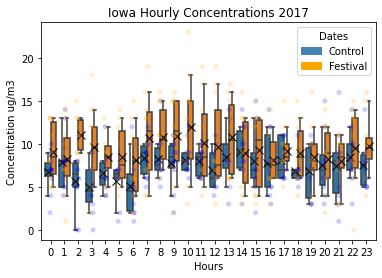

In [3]:
xls = pd.ExcelFile('ControlDayVar.xlsx')
df1= pd.read_excel(xls, 'IA_ControlDays').assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays').assign(Location=2)
DE_all =pd.concat([df1[20:30],df2[21:31]])

DE= pd.melt(DE_all, id_vars=['Location'], var_name=['Hours'], value_name='Concentration ug/m3')
DE['Hours'] = pd.to_numeric(DE['Hours'])
DE['Concentration ug/m3']=pd.to_numeric(DE['Concentration ug/m3'])

ax4= sns.boxplot(x='Hours', y= 'Concentration ug/m3', hue= 'Location', data=DE,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white", 
                                             "markeredgecolor":"black"}).set(title='Iowa Hourly Concentrations 2017')
df1= pd.read_excel(xls, 'IA_ControlDays')#.assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays')#.assign(Location=2)
DE_all =pd.concat([df1[20:30],df2[21:31]])


sns.stripplot(color='blue',alpha=0.2,data=df1[20:30])
sns.stripplot(color='orange',alpha=0.2,data=df2[21:31])

cont = mpatches.Patch(color='steelblue', label='Control')
fest = mpatches.Patch(color='orange', label='Festival')
plt.legend(title='Dates',handles=[cont,fest])

plt.plot()

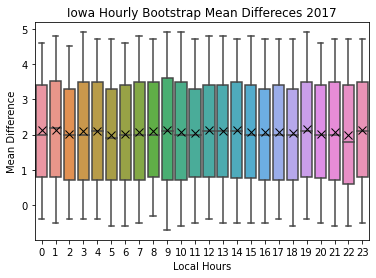

In [17]:
##2017
diffs.clear()
df_diffs=df_diffs.iloc[0:0]
sample_cont_mean = []
sample_fest_mean = []
samples_cont =[]
samples_fest =[]
diffs = []
cont = df1[20:30]
fest = df2[20:30]
for j in range(24):
    #iterate 1000 times
    for i in range(1000):
        #Set cont/fest dataframe houlry colulmns to array and remove NAN values
        cont_hour = cont[j][~np.isnan(cont[j])]
        fest_hour = fest[j][~np.isnan(fest[j])]
        #Randomly pick 10 sample from cont/fest array with replacement
        cont_boot = np.random.choice(cont_hour, replace=True, size=10)
        fest_boot = np.random.choice(fest_hour, replace=True, size=10) 
        #append samples to varify later
        samples_cont.append(cont_boot)
        samples_fest.append(fest_boot)
        #Find mean of 10 samples
        avg_cont = np.mean(cont_boot)
        avg_fest = np.mean(fest_boot)
        #append samples to verify later
        sample_cont_mean.append(avg_cont)
        sample_fest_mean.append(avg_fest)
        #Find difference of control and festival mean
        diff = avg_fest - avg_cont
        #append list to verify later
        diffs.append(diff)


diffs= np.array_split(diffs,1000)
df_diffs = pd.DataFrame(diffs)
subset = df_diffs[df_diffs > 0]
statcount = subset.count()
ax2= sns.boxplot(data=df_diffs,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white",
                                             "markeredgecolor":"black"}).set(title="Iowa Hourly Bootstrap Mean Differeces 2017", xlabel= 'Local Hours', ylabel='Mean Difference')



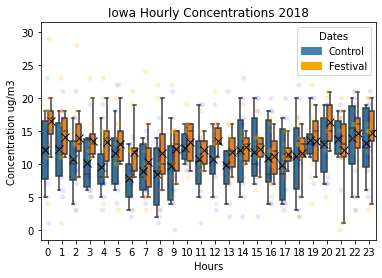

In [14]:
### 2018
xls = pd.ExcelFile('ControlDayVar.xlsx')
df1= pd.read_excel(xls, 'IA_ControlDays').assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays').assign(Location=2)
DE_all =pd.concat([df1[10:20],df2[10:21]])

DE= pd.melt(DE_all, id_vars=['Location'], var_name=['Hours'], value_name='Concentration ug/m3')
DE['Hours'] = pd.to_numeric(DE['Hours'])
DE['Concentration ug/m3']=pd.to_numeric(DE['Concentration ug/m3'])

ax3= sns.boxplot(x='Hours', y= 'Concentration ug/m3', hue= 'Location', data=DE,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white", 
                                             "markeredgecolor":"black"}).set(title='Iowa Hourly Concentrations 2018')
df1= pd.read_excel(xls, 'IA_ControlDays')#.assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays')#.assign(Location=2)
DE_all =pd.concat([df1[10:20],df2[10:21]])
ax.set_title("Iowa Deleware Hourly Concentrations 2018",y=1.0, pad=-14)
sns.stripplot(color='blue',alpha=0.1,data=df1[10:20])
sns.stripplot(color='orange',alpha=0.2,data=df2[10:21])
cont = mpatches.Patch(color='steelblue', label='Control')
fest = mpatches.Patch(color='orange', label='Festival')
plt.legend(title='Dates',handles=[cont,fest], loc= 'upper right')



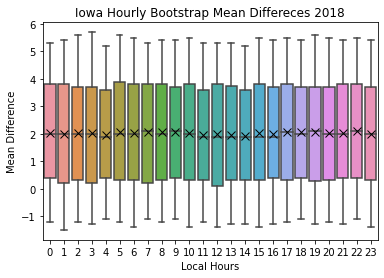

In [16]:
##2018
diffs.clear()
df_diffs=df_diffs.iloc[0:0]
sample_cont_mean = []
sample_fest_mean = []
samples_cont =[]
samples_fest =[]
diffs = []
cont = df1[10:20]
fest = df2[10:20]
for j in range(24):
    #iterate 1000 times
    for i in range(1000):
        #Set cont/fest dataframe houlry colulmns to array and remove NAN values
        cont_hour = cont[j][~np.isnan(cont[j])]
        fest_hour = fest[j][~np.isnan(fest[j])]
        #Randomly pick 10 sample from cont/fest array with replacement
        cont_boot = np.random.choice(cont_hour, replace=True, size=10)
        fest_boot = np.random.choice(fest_hour, replace=True, size=10) 
        #append samples to varify later
        samples_cont.append(cont_boot)
        samples_fest.append(fest_boot)
        #Find mean of 10 samples
        avg_cont = np.mean(cont_boot)
        avg_fest = np.mean(fest_boot)
        #append samples to verify later
        sample_cont_mean.append(avg_cont)
        sample_fest_mean.append(avg_fest)
        #Find difference of control and festival mean
        diff = avg_fest - avg_cont
        #append list to verify later
        diffs.append(diff)


diffs= np.array_split(diffs,1000)
df_diffs = pd.DataFrame(diffs)
subset = df_diffs[df_diffs > 0]
statcount = subset.count()
ax2= sns.boxplot(data=df_diffs,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white",
                                             "markeredgecolor":"black"}).set(title='Iowa Hourly Bootstrap Mean Differeces 2018', xlabel= 'Local Hours', ylabel='Mean Difference')



Text(0.5, 1.0, 'Iowa Hourly Bootstrap Mean Differeces 2017')

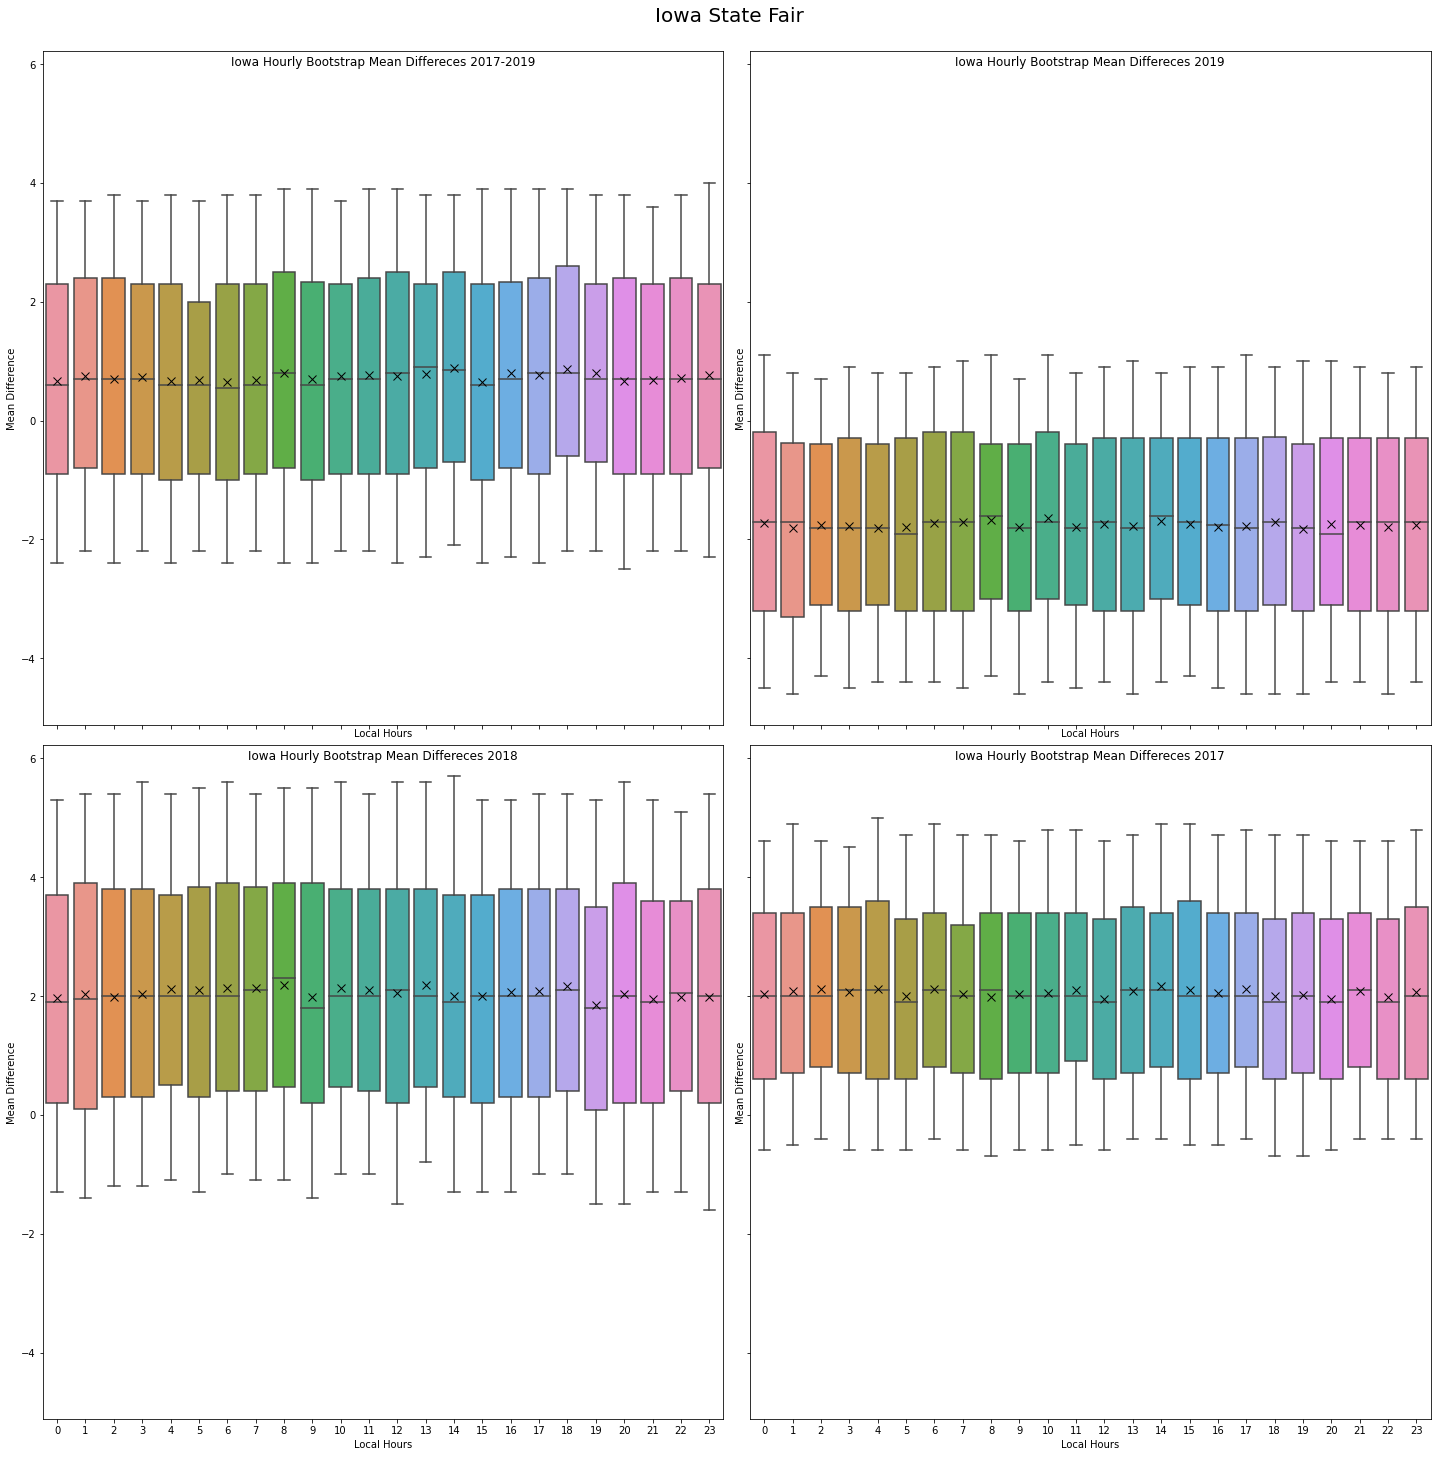

In [9]:
xls = pd.ExcelFile('ControlDayVar.xlsx')
df1= pd.read_excel(xls, 'IA_ControlDays').assign(Location=1)
df2= pd.read_excel(xls, 'IA_FestDays').assign(Location=2)

import random
cont = df1
fest = df2
sample_cont_mean = []
sample_fest_mean = []
samples_cont =[]
samples_fest =[]
diffs = []


for j in range(24):
    #iterate 1000 times
    for i in range(1000):
        #Set cont/fest dataframe houlry colulmns to array and remove NAN values
        cont_hour = cont[j][~np.isnan(cont[j])]
        fest_hour = fest[j][~np.isnan(fest[j])]
        #Randomly pick 10 sample from cont/fest array with replacement
        cont_boot = np.random.choice(cont_hour, replace=True, size=10)
        fest_boot = np.random.choice(fest_hour, replace=True, size=10) 
        #append samples to varify later
        samples_cont.append(cont_boot)
        samples_fest.append(fest_boot)
        #Find mean of 10 samples
        avg_cont = np.mean(cont_boot)
        avg_fest = np.mean(fest_boot)
        #append samples to verify later
        sample_cont_mean.append(avg_cont)
        sample_fest_mean.append(avg_fest)
        #Find difference of control and festival mean
        diff = avg_fest - avg_cont
        #append list to verify later
        diffs.append(diff)
        
#all years
fig, axes = plt.subplots(2, 2, sharey=True,  sharex=True,figsize=(20,20)) #Set up subplot axes
fig.suptitle('Iowa State Fair',fontsize=20, y= 1.)

fig.tight_layout()

#All years
cont = df1
fest = df2
diffs= np.array_split(diffs,1000)
df_diffs = pd.DataFrame(diffs)
subset = df_diffs[df_diffs > 0]
statcount = subset.count()
ax1= sns.boxplot(ax= axes[0,0],data=df_diffs,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white",
                                             "markeredgecolor":"black"}).set(title='DE All Years Bootstrap Diffs', xlabel= 'Local Hours', ylabel='Mean Difference')
axes[0,0].set_title("Iowa Hourly Bootstrap Mean Differeces 2017-2019",y=1.0, pad=-14)


##2019
diffs.clear()
df_diffs=df_diffs.iloc[0:0]
sample_cont_mean = []
sample_fest_mean = []
samples_cont =[]
samples_fest =[]
diffs = []
cont = df1[0:10]
fest = df2[0:10]
for j in range(24):
    #iterate 1000 times
    for i in range(1000):
        #Set cont/fest dataframe houlry colulmns to array and remove NAN values
        cont_hour = cont[j][~np.isnan(cont[j])]
        fest_hour = fest[j][~np.isnan(fest[j])]
        #Randomly pick 10 sample from cont/fest array with replacement
        cont_boot = np.random.choice(cont_hour, replace=True, size=10)
        fest_boot = np.random.choice(fest_hour, replace=True, size=10) 
        #append samples to varify later
        samples_cont.append(cont_boot)
        samples_fest.append(fest_boot)
        #Find mean of 10 samples
        avg_cont = np.mean(cont_boot)
        avg_fest = np.mean(fest_boot)
        #append samples to verify later
        sample_cont_mean.append(avg_cont)
        sample_fest_mean.append(avg_fest)
        #Find difference of control and festival mean
        diff = avg_fest - avg_cont
        #append list to verify later
        diffs.append(diff)


diffs= np.array_split(diffs,1000)
df_diffs = pd.DataFrame(diffs)
subset = df_diffs[df_diffs > 0]
statcount = subset.count()
ax2= sns.boxplot(ax= axes[0,1],data=df_diffs,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white",
                                             "markeredgecolor":"black"}).set(title='DE All Years Bootstrap Diffs', xlabel= 'Local Hours', ylabel='Mean Difference')
axes[0,1].set_title("Iowa Hourly Bootstrap Mean Differeces 2019",y=1.0, pad=-14)


##2018
diffs.clear()
df_diffs=df_diffs.iloc[0:0]
sample_cont_mean = []
sample_fest_mean = []
samples_cont =[]
samples_fest =[]
diffs = []
cont = df1[10:20]
fest = df2[10:20]
for j in range(24):
    #iterate 1000 times
    for i in range(1000):
        #Set cont/fest dataframe houlry colulmns to array and remove NAN values
        cont_hour = cont[j][~np.isnan(cont[j])]
        fest_hour = fest[j][~np.isnan(fest[j])]
        #Randomly pick 10 sample from cont/fest array with replacement
        cont_boot = np.random.choice(cont_hour, replace=True, size=10)
        fest_boot = np.random.choice(fest_hour, replace=True, size=10) 
        #append samples to varify later
        samples_cont.append(cont_boot)
        samples_fest.append(fest_boot)
        #Find mean of 10 samples
        avg_cont = np.mean(cont_boot)
        avg_fest = np.mean(fest_boot)
        #append samples to verify later
        sample_cont_mean.append(avg_cont)
        sample_fest_mean.append(avg_fest)
        #Find difference of control and festival mean
        diff = avg_fest - avg_cont
        #append list to verify later
        diffs.append(diff)


diffs= np.array_split(diffs,1000)
df_diffs = pd.DataFrame(diffs)
subset = df_diffs[df_diffs > 0]
statcount = subset.count()
ax2= sns.boxplot(ax= axes[1,0],data=df_diffs,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white",
                                             "markeredgecolor":"black"}).set(title='DE All Years Bootstrap Diffs', xlabel= 'Local Hours', ylabel='Mean Difference')
axes[1,0].set_title("Iowa Hourly Bootstrap Mean Differeces 2018",y=1.0, pad=-14)


##2017
diffs.clear()
df_diffs=df_diffs.iloc[0:0]
sample_cont_mean = []
sample_fest_mean = []
samples_cont =[]
samples_fest =[]
diffs = []
cont = df1[20:30]
fest = df2[20:30]
for j in range(24):
    #iterate 1000 times
    for i in range(1000):
        #Set cont/fest dataframe houlry colulmns to array and remove NAN values
        cont_hour = cont[j][~np.isnan(cont[j])]
        fest_hour = fest[j][~np.isnan(fest[j])]
        #Randomly pick 10 sample from cont/fest array with replacement
        cont_boot = np.random.choice(cont_hour, replace=True, size=10)
        fest_boot = np.random.choice(fest_hour, replace=True, size=10) 
        #append samples to varify later
        samples_cont.append(cont_boot)
        samples_fest.append(fest_boot)
        #Find mean of 10 samples
        avg_cont = np.mean(cont_boot)
        avg_fest = np.mean(fest_boot)
        #append samples to verify later
        sample_cont_mean.append(avg_cont)
        sample_fest_mean.append(avg_fest)
        #Find difference of control and festival mean
        diff = avg_fest - avg_cont
        #append list to verify later
        diffs.append(diff)


diffs= np.array_split(diffs,1000)
df_diffs = pd.DataFrame(diffs)
subset = df_diffs[df_diffs > 0]
statcount = subset.count()
ax2= sns.boxplot(ax= axes[1,1],data=df_diffs,whis=[10,90],showmeans=True,
                showfliers=False, meanprops={"marker":"x","markersize":8,"markerfacecolor":"white",
                                             "markeredgecolor":"black"}).set(title='DE All Years Bootstrap Diffs', xlabel= 'Local Hours', ylabel='Mean Difference')
axes[1,1].set_title("Iowa Hourly Bootstrap Mean Differeces 2017",y=1.0, pad=-14)
